In [72]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import json
import os
import cPickle as pickle
from collections import Counter
import pandas
from datetime import datetime
from shutil import copyfile
import platform
import scipy.stats

In [60]:
popularRoot = "/datasets/sagarj/vineData/Dataset/"
recentRoot = "/datasets/sagarj/vine2016/Dataset/"
PostDir = "savedPosts/"
popUserDir = "Users/"
unpopUserDir = "UserProfiles3/"
vidsDir = "Videos/"
tracked = "/postTracking/Day53/"
unpopularDir = "/datasets/sagarj/UnPopular2016_senti/"
unpopVidsDir = unpopularDir + "Videos/"
unpopPostsDir = unpopularDir + "Posts/"
socialFeatures = "../Final_features/postSocialMetaFeatures_revised.pk"


In [79]:
def readJson(path):
    f = open(path)
    data = json.loads(f.read())
    return data

def getPopular():
    popularDir = popularRoot + PostDir
    popularPosts = os.listdir(popularDir)
    posts = []
    for post in popularPosts:
        record = readJson(popularDir + post)
        p = record['data']
        if isinstance(p,dict):
            posts.append(p['records'][0])
    return posts

def getUsersPop():
    popularDir = popularRoot + popUserDir
    popularPosts = os.listdir(popularDir)
    userMetaDict = {}
    posts = []
    followers = []
    for post in popularPosts:
        record = readJson(popularDir + post)
        p = record['data']
        if isinstance(p,dict) and p.has_key('followerCount'):
            posts.append(p)
            userId = p['userId']
            flwer= p['followerCount']
            pastPosts = p['authoredPostCount']
            followers.append(p['followerCount'])
            #userMetaDict[userId] = [flwer , pastPosts]
            userMetaDict[userId] = {'follower' : flwer , 'pastPosts': pastPosts}     
    return posts , followers , userMetaDict

def getUsersUnPop():
    popularDir = recentRoot + unpopUserDir
    popularPosts = os.listdir(popularDir)
    posts = []
    followers = []
    userMetaDict = {}
    for post in popularPosts:
        record = readJson(popularDir + post)
        p = record['data']
        if isinstance(p,dict) and p.has_key('followerCount'):
            posts.append(p)
            userId = p['userId']
            flwer = p['followerCount']
            pastPosts = p['authoredPostCount']
            followers.append(p['followerCount'])
            userMetaDict[userId] = {'follower' : flwer , 'pastPosts': pastPosts}          
    return posts , followers , userMetaDict

def sorted_ls(path):
    mtime = lambda f: os.stat(os.path.join(path, f)).st_mtime
    return list(sorted(os.listdir(path), key=mtime))

    

def getCrawled(root , postDir):
    crawledDir = root + postDir
    crawledPosts = os.listdir(crawledDir)
    print len(crawledPosts)
    posts = []
    postDict = {}
    for post in crawledPosts:
        postid = post.split('.')[0]
        record = readJson(crawledDir + post)
        p = record['data']
        if isinstance(p,dict):
            posts.append(p['records'][0])
            postDict[postid] = p['records'][0]
    print len(postDict.keys())
    return posts , postDict

def getPopMetrics(vineList):
    likes = []
    reposts = []
    loops = []
    timestamps = []
    for vine in vineList:
        likes.append(vine['likes']['count'])
        reposts.append(vine['reposts']['count'])
        loops.append(vine['loops']['count'])
        timestamps.append(datetime.strptime(vine['created'], '%Y-%m-%dT%H:%M:%S.%f'))
    return likes, reposts, loops, timestamps

def copyList(listOfFiles,srcFolder , dstFolder):
    if not os.path.exists(dstFolder):
        os.makedirs(dstFolder)
    for f in listOfFiles:
        src = srcFolder + f
        dst = dstFolder + f
        copyfile(src , dst)
        
    sentiDict = {}
    for line in lines:
        comp = line.split(',')
        sentiDict[comp[0]] = float(comp[1].strip())
    return sentiDict

def readFeatureFile(color_features):
    with open(color_features) as g:
        featureLines = g.readlines()
    print len(featureLines)
    return featureLines


def postFollowerMapping(postsInterested , postDict , userDict ):
    finalMeta = []
    finalDict = {}
    for postId in postsInterested:
        if postId in postDict:
            post = postDict[postId]
            like = post['likes']['count']
            loop = post['loops']['count']
            reposts = post['reposts']['count']
            user = post['userId']
            if user in userDict:
                userMeta = userDict[user]
                logline = [postId,  userMeta['follower'], userMeta['pastPosts'] , loop , like , reposts ]
                finalMeta.append(logline)
                finalDict[postId] = {}
                
                finalDict[postId]['followers'] = userMeta['follower']
                finalDict[postId]['pastPosts'] = userMeta['pastPosts']
                finalDict[postId]['loops'] = loop
                finalDict[postId]['likes'] = like
                finalDict[postId]['reposts'] = reposts
    return finalMeta , finalDict
        
        
            
        
    


In [5]:
# print sorted_ls(unpopPostsDir)

In [7]:

recentList , recentDict = getCrawled(recentRoot , PostDir )

122326
122298


In [67]:
recentDict.keys()[1]

'1385887276084670464'

In [10]:
popularList = getPopular()

In [11]:
trackedList , trackedDict = getCrawled(recentRoot , tracked )

106396
74948


In [13]:
popList , popDict = getCrawled(popularRoot , PostDir )

11448
11448


In [65]:
popList[100]

{u'avatarUrl': u'http://v.cdn.vine.co/r/avatars/84FA93D1A31060281176683626496_1b9022d1310.4.8.jpg?versionId=riNJV1TrcNL0p4MgG3EAi8xvIK0CAHFk',
 u'blocked': 0,
 u'comments': {u'anchor': 1288810385016864768,
  u'anchorStr': u'1288810385016864768',
  u'backAnchor': u'',
  u'count': 78,
  u'nextPage': 2,
  u'previousPage': None,
  u'records': [{u'comment': u'\U0001f602\U0001f602\U0001f602 Dani',
    u'commentId': 1288810385016864768,
    u'created': u'2015-12-16T07:22:34.000000',
    u'entities': [{u'id': 991243928495931392,
      u'link': u'vine://user-id/991243928495931392',
      u'range': [4, 8],
      u'title': u'Dani',
      u'type': u'mention',
      u'vanityUrls': []}],
    u'postId': 1288669426337685504,
    u'profileBackground': u'0xf279ac',
    u'user': {u'avatarUrl': u'http://v.cdn.vine.co/r/avatars/84FA93D1A31060281176683626496_1b9022d1310.4.8.jpg?versionId=riNJV1TrcNL0p4MgG3EAi8xvIK0CAHFk',
     u'description': u'Lincoln is the funniest man in the world...Kanye fan for life..

In [14]:
recentLikes , recentReposts, recentLoops , recentTimestamps = getPopMetrics(recentList)

popLikes , popReposts, popLoops , popTimeStamps= getPopMetrics(popularList)

trackedLikes , trackedReposts, trackedLoops , trackedTimeStamps= getPopMetrics(trackedList)

In [69]:
print np.min(popLikes) , np.min(popReposts) , np.min(popLoops)

10 0 247.0


In [15]:
totalDict = trackedDict.copy()
totalDict.update(popDict)
print len(totalDict.keys())

86396


In [16]:
totalPostDict = dict(totalDict.items() + recentDict.items())

In [17]:
print len(totalPostDict.keys())

133746


In [25]:
Likes = popLikes+ trackedLikes
Reposts = popReposts+ recentReposts

In [26]:
Likes = map(lambda x: 0.000001 if x == 0 else x, Likes)
Reposts = map(lambda x: 0.000001 if x == 0 else x, Reposts)

In [27]:
print np.mean(popLoops) , np.median(popLoops) , np.mean(popReposts) , np.median(popReposts) , np.mean(popLikes) , np.median(popLikes)

2405671.25227 318566.0 16064.1971523 2173.0 42521.1856219 7544.0


In [28]:
print np.var(np.log(popLoops)),np.var(np.log(popLikes)),np.var(np.log(popReposts))


3.76014642548 3.17332322635 nan


In [74]:
print scipy.stats.pearsonr( popLoops , popLikes)
print scipy.stats.pearsonr( popReposts , popLikes)
print scipy.stats.pearsonr( popLoops , popReposts)

(0.80327844665284653, 0.0)
(0.91012162623020465, 0.0)
(0.73688981182333535, 0.0)


In [29]:
sampleL = np.random.choice(len(Likes) , 3000)
sampleR = np.random.choice(len(Reposts) , 3000)

In [30]:
likes = [Likes[i] for i in sampleL]
reposts = [Reposts[i] for i in sampleR]

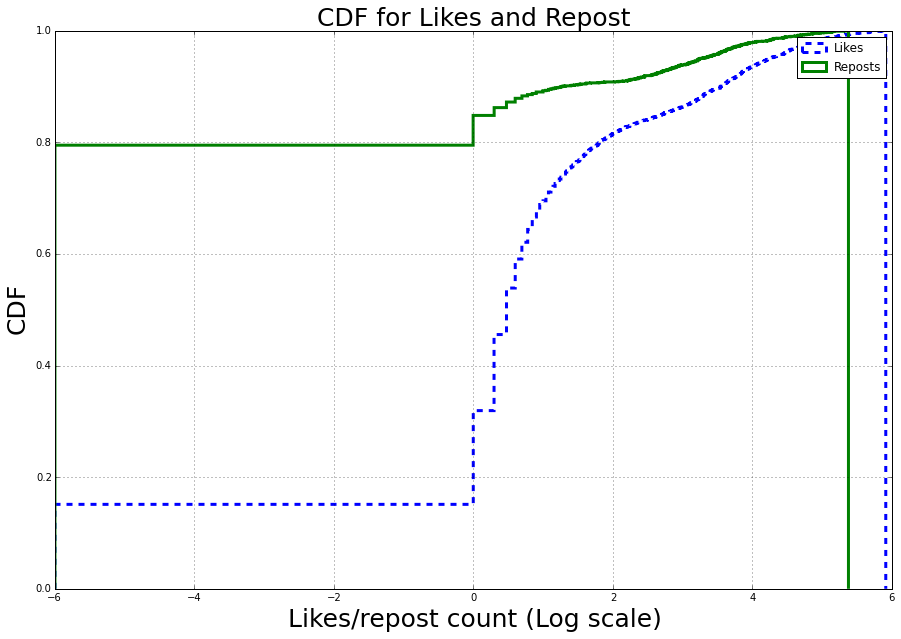

In [62]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.hist(np.log10(likes), 2000, normed=1,histtype='step', cumulative=True,linewidth = 3.0,linestyle='dashed')
plt.hist(np.log10(reposts), 2000, normed=1,histtype='step', cumulative=True,linewidth = 3.0)
plt.title("CDF for Likes and Repost", fontsize = 25)
plt.xlabel("Likes/repost count (Log scale)",fontsize = 25)
plt.ylabel("CDF",fontsize = 25)
plt.legend(['Likes' , 'Reposts'])
plt.grid(True)
plt.show()

In [32]:
Top1000 = np.argsort(trackedLoops)[-50:]
trackedTop1000 = [trackedLoops[i] for i in Top1000]
trackedTop1000Posts = [trackedList[i] for i in Top1000]
print len(trackedTop1000)

50


In [33]:
print np.median(trackedTop1000) , np.mean(trackedTop1000) , np.var(trackedTop1000)

3573113.0 4897585.48 1.53332743735e+13


In [34]:
unpopular3000 = np.argsort(trackedLoops)[:12000]
unpop3000loops = [trackedLoops[i] for i in unpopular3000]
unpop3000Posts = [trackedList[i] for i in unpopular3000]

In [35]:
print np.median(unpop3000loops) , np.mean(unpop3000loops) , np.var(unpop3000loops)

13.0 12.3319166667 36.3549146597


In [36]:
unpopPostList = []
for p in unpop3000Posts: 
    postid = p['postId']
    filename = str(postid) + ".json"
    unpopPostList.append(filename)

In [37]:
print len(unpopPostList)

12000


In [38]:
# srcPosts = "/datasets/sagarj/vine2016/Dataset//postTracking/Day24/"
# copyList(unpopPostList, srcPosts , unpopPostsDir)

In [39]:
unpopVidList = []
for p in unpop3000Posts: 
    postid = p['videoUrl'].split('/')[5].split('?')[0]
    filename = str(postid)
    unpopVidList.append(filename)

In [40]:
print unpopVidList[:10]

['56E9A2CD631396567434898624512_1475945442200a68c4b634d.mp4.mp4', 'D46F96BE3C1390509114018443264_SW_WEBM_14744937937903eae87ef7f.mp4', 'E13104E5501387973345433518080_SW_WEBM_1473889083001c550b0aa79.mp4', '051960C4931395972202138087424_SW_WEBM_147579990287076ad916687.mp4', '649C6855CB1396518013175791616_14759336601432789ae47ad.mp4.mp4', 'CC2059D3F71390494763781898240_SW_WEBM_147449264545875cedbf19a.mp4', '069007C41A1387976625198608384_SW_WEBM_14738904530429e37a77ba8.mp4', 'B9C860C9D61393749184758562816_SW_WEBM_14752698939343ed4d7f319.mp4', '7DEE9880B61395971558396559360_SW_WEBM_14757997066029fd2c73b2a.mp4', 'D755AC621A1395973820376145920_SW_WEBM_147580026711712a76e4e80.mp4']


In [41]:
# srcVids = recentRoot + vidsDir
# copyList(unpopVidList, srcVids , unpopVidsDir)

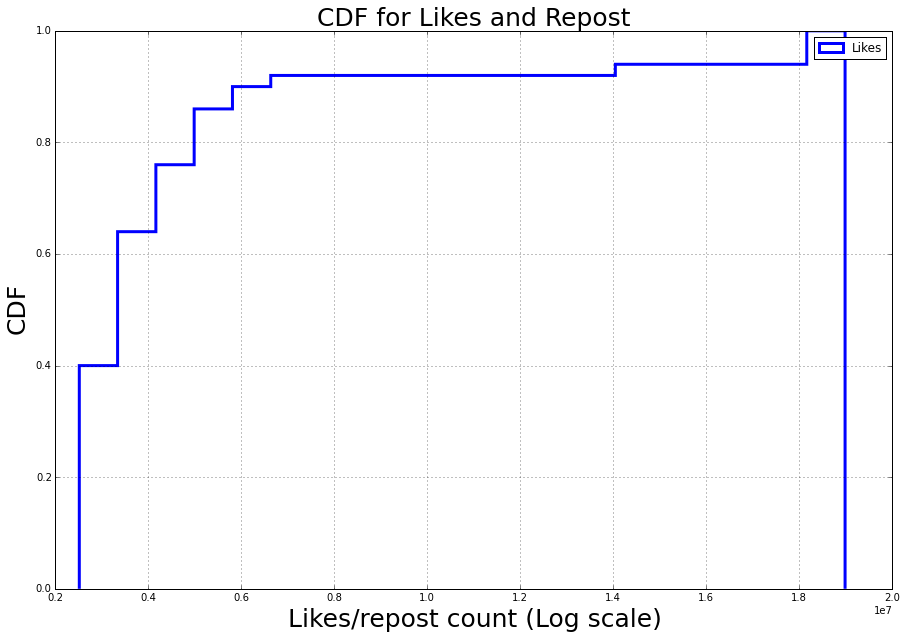

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
#plt.hist(popLikes, 1000, normed=1,histtype='step', cumulative=True,linewidth = 3.0,linestyle='dashed')
#plt.hist(popReposts, 1000, normed=1,histtype='step', cumulative=False,linewidth = 3.0)
plt.hist(trackedTop1000, 20, normed=1,histtype='step', cumulative=True,linewidth = 3.0)
plt.title("CDF for Likes and Repost", fontsize = 25)
plt.xlabel("Likes/repost count (Log scale)",fontsize = 25)
plt.ylabel("CDF",fontsize = 25)
plt.legend(['Likes' , 'Reposts'])
plt.grid(True)
plt.show()

In [43]:
print np.median(popLoops) , np.mean(popLoops) , np.var(popLoops)

318566.0 2405671.25227 4.50174420562e+13


In [44]:
print pow(10,4.5)

31622.7766017


In [45]:
popUsers, popFollowers , popDict = getUsersPop()

In [46]:
print np.mean(popFollowers) , np.median(popFollowers) , len(popFollowers)

366738.428633 40012.0 2319


In [47]:
unpopUsers, unpopFollowers , unpopDict = getUsersUnPop()

In [48]:
userDict = unpopDict.copy()
userDict.update(popDict)

In [49]:
print len(userDict.keys())

36815


In [50]:
print unpopUsers[1]

{u'username': u'twelve', u'twitterScreenname': u'shoyofam', u'followerCount': 14735, u'verified': 0, u'vanityUrls': [u'momotaroumikoshiba'], u'twitterVerified': 0, u'avatarUrl': u'http://v.cdn.vine.co/r/avatars/EF0A9489791397259422337802240_5e40659488f.37.0.jpg?versionId=a67kjdZfjZxcNDIKiAglIE.XfeI4g.LS', u'authoredPostCount': 60, u'shareUrl': u'https://vine.co/momotaroumikoshiba', u'userId': 1140725499174502400, u'location': u'\U0001f498 marmite & chrome \U0001f498', u'profileBackground': u'0x333333', u'likeCount': 8392, u'postCount': 2317, u'loopVelocity': 0.13599999999999998, u'private': 0, u'followingCount': 96, u'secondaryColor': u'0x3E4F57', u'loopCount': 13138238, u'explicitContent': 0, u'description': u'hello !!\nae \nkik: .twelve \n#1 akise aru enthusiast\nfuah | citric \n(I love everything & everything hates me)'}


In [51]:
print np.mean(unpopFollowers) , np.median(unpopFollowers) , len(unpopFollowers)

7088.24899506 80.0 34828


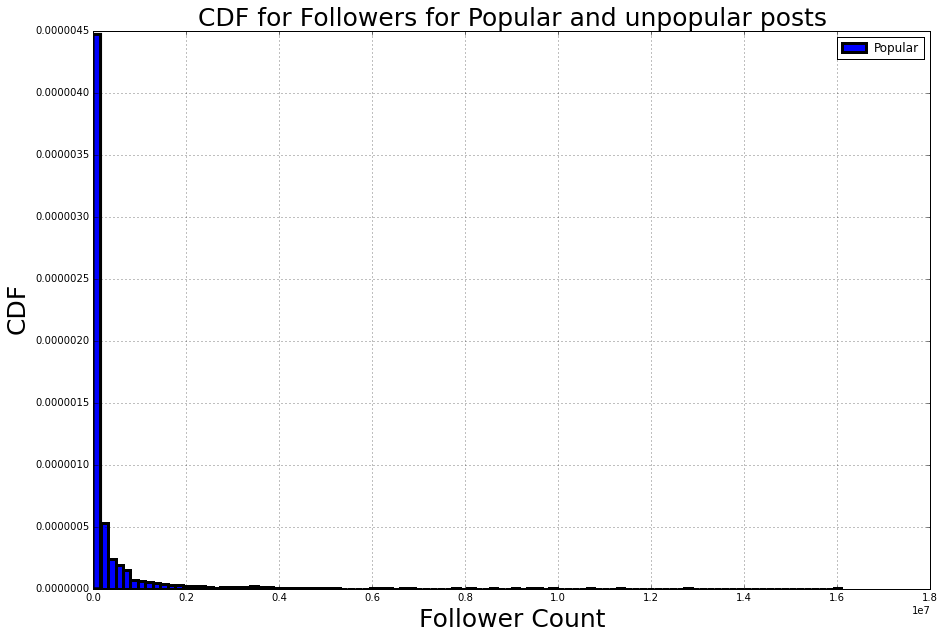

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.hist(popFollowers, 100, normed=1,histtype='bar', cumulative=False,linewidth = 3.0)
#plt.hist(unpopFollowers, 100, normed=1,histtype='step', cumulative=True,linewidth = 3.0)
plt.title("CDF for Followers for Popular and unpopular posts", fontsize = 25)
plt.xlabel("Follower Count",fontsize = 25)
plt.ylabel("CDF",fontsize = 25)
plt.legend(['Popular' , 'Unpopular'])
plt.grid(True)
plt.show()

In [53]:
def readSentiFeatures(sentilines):
    sentiDict = {}
    for line in sentilines: 
        comps = line.strip().split(',')
        sentiDict[comps[0]] = float(comps[1])
    return sentiDict

In [54]:
meanSentiment = "../Final_features/median_sentiments.csv"
senti_csv = readFeatureFile(meanSentiment)

sentiDict = readSentiFeatures(senti_csv)

23441


In [55]:
postIds = sentiDict.keys()
print len(postIds)

23441


In [80]:
postUserMeta , finalDict = postFollowerMapping(postIds,totalPostDict,userDict)

In [57]:
print len(postUserMeta)

22192


In [81]:
finalDict['1232413732706160640']

{'followers': 211532,
 'likes': 128792,
 'loops': 4603788.0,
 'pastPosts': 346,
 'reposts': 67262}

In [82]:
finalDict['1275430531974504448']

{'followers': 71634,
 'likes': 12661,
 'loops': 351413.0,
 'pastPosts': 490,
 'reposts': 5233}

In [58]:
postUserMeta[100]

['1275430531974504448', 71634, 490, 351413.0, 12661, 5233]

In [61]:
# f = open(socialFeatures , 'w+')
# pickle.dump(postUserMeta , f)
# f.close()